<a href="https://colab.research.google.com/github/arputtick/dataism/blob/master/Week_4_Class_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx

In [ ]:
social_net_graph = nx.DiGraph()

In [ ]:
social_net_graph.add_edges_from([(1,2), (1,3), (1,5), (2,1), (3,2), (4,2), (4,3), (5,3),\
                                (5,4), (6,4), (6,5)])

In [ ]:
social_net_graph.edges

OutEdgeView([(1, 2), (1, 3), (1, 5), (2, 1), (3, 2), (5, 3), (5, 4), (4, 2), (4, 3), (6, 4), (6, 5)])

In [ ]:
social_net_graph.nodes

NodeView((1, 2, 3, 5, 4, 6))

In [ ]:
pos = nx.spring_layout(social_net_graph) # positions nodes in graph

In [ ]:
pos

{1: array([ 0.21276617, -0.39899533]),
 2: array([1.        , 0.09587546]),
 3: array([0.15300306, 0.08803727]),
 4: array([-0.03730845,  0.58126291]),
 5: array([-0.82725652, -0.1831016 ]),
 6: array([-0.50120427, -0.1830787 ])}

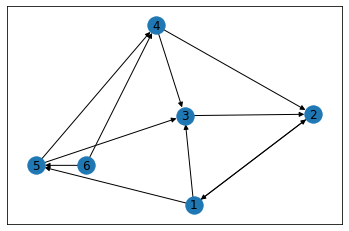

In [ ]:
nx.draw_networkx(social_net_graph, pos)

In [ ]:
# add 'influence weights'
in_deg = social_net_graph.in_degree()

In [ ]:
in_deg

InDegreeView({1: 1, 2: 3, 3: 3, 5: 2, 4: 2, 6: 0})

In [ ]:
for edge in social_net_graph.edges:
    social_net_graph.edges[edge[0],edge[1]]['influence'] = 1 / in_deg[edge[1]]

In [ ]:
for edge in social_net_graph.edges:
    print(edge, social_net_graph[edge[0]][edge[1]]['influence'])

(1, 2) 0.3333333333333333
(1, 3) 0.3333333333333333
(1, 5) 0.5
(2, 1) 1.0
(3, 2) 0.3333333333333333
(5, 3) 0.3333333333333333
(5, 4) 0.5
(4, 2) 0.3333333333333333
(4, 3) 0.3333333333333333
(6, 4) 0.5
(6, 5) 0.5


In [ ]:
seeds = [1,3, 6]
not_seeds = [2,4,5]

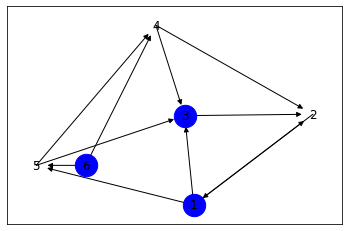

In [ ]:
nx.draw_networkx(social_net_graph, pos, 
                    nodelist = seeds,
    node_color = 'b',
                 node_size = 500,
    )

In [ ]:
for node in social_net_graph.nodes:
    social_net_graph.nodes[node]['threshold'] = 0.5

In [ ]:
social_net_graph.nodes[1]['threshold']

0.5

In [ ]:
# influence spread
new_seeds = []
for node in social_net_graph.nodes:
    if node in seeds:
        continue
    else:
        influence_sum = 0
        for neighbor in social_net_graph.predecessors(node):
            if neighbor in seeds:
                influence_sum += social_net_graph.edges[neighbor,node]['influence']
        
        if influence_sum > social_net_graph.nodes[node]['threshold']:
            new_seeds.append(node)
            not_seeds.remove(node) # this is book-keeping for drawing the graphs

seeds += new_seeds

In [ ]:
seeds

[1, 3, 6, 2, 5, 4]

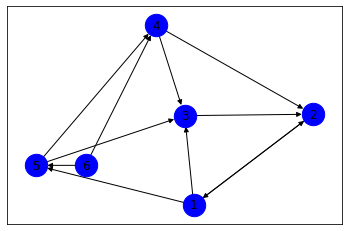

In [ ]:
nx.draw_networkx(social_net_graph, pos, 
                    nodelist = seeds,
    node_color = 'b',
                 node_size = 500,
    )